In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install transformers

In [3]:
!pip install tqdm

In [ ]:
import zipfile

# 압축 해제할 파일 경로
zip_file_path = '/content/drive/MyDrive/share/tag_22.zip'

# 압축을 풀 디렉토리 경로
extract_path = '/content/drive/MyDrive/Data_set3/tags'

# ZIP 파일을 압축 해제
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


# tags 폴더는 이미지 데이터 세트 224*224로 사전에 전처리된 이미지들을 train 70% val 20% test 10%로 나눌거임

In [ ]:
import os
import shutil
from pathlib import Path
import random

# 경로 설정
source_folder = Path('/content/drive/MyDrive/Data_set3/tags')
destination_folder = Path('/content/drive/MyDrive/Data_set2')

# train, val, test 서브 폴더 생성
sub_folders = ['train', 'val', 'test']
for sub_folder in sub_folders:
    os.makedirs(destination_folder / sub_folder, exist_ok=True)

# 각 tag 폴더에 대해 반복
for tag in range(29):  # tag_00 ~ tag_28
    # tag별 서브 폴더 생성
    for sub_folder in sub_folders:
        os.makedirs(destination_folder / sub_folder / f'{sub_folder}_tag_{tag:02}', exist_ok=True)

    # 이미지 파일 리스트
    images = os.listdir(source_folder / f'tag_{tag:02}')
    random.shuffle(images)  # 이미지 섞기

    # 분할 비율 설정
    train_split = int(0.7 * len(images))
    val_split = int(0.2 * len(images))

    # 이미지 분할
    train_images = images[:train_split]
    val_images = images[train_split:train_split + val_split]
    test_images = images[train_split + val_split:]

    # 이미지 복사
    for img in train_images:
        shutil.copy(source_folder / f'tag_{tag:02}' / img, destination_folder / 'train' / f'train_tag_{tag:02}' / img)
    for img in val_images:
        shutil.copy(source_folder / f'tag_{tag:02}' / img, destination_folder / 'val' / f'val_tag_{tag:02}' / img)
    for img in test_images:
        shutil.copy(source_folder / f'tag_{tag:02}' / img, destination_folder / 'test' / f'test_tag_{tag:02}' / img)

코랩에는 폴더랑 이미지가 있는데 드라이브에 올라가지 않아서 나눠서 작업함

In [ ]:
# import os
# import shutil
# from pathlib import Path
# import random

# # 경로 설정
# source_folder = Path('/content/drive/MyDrive/Data_set3/tags')
# destination_folder = Path('/content/drive/MyDrive/Data_set2')

# # train, val, test 서브 폴더 생성
# sub_folders = ['train', 'val', 'test']
# for sub_folder in sub_folders:
#     os.makedirs(destination_folder / sub_folder, exist_ok=True)

# # tag_24부터 tag_28까지의 폴더에 대해 반복
# for tag in range(24, 29):  # tag_24 ~ tag_28
#     # tag별 서브 폴더 생성
#     for sub_folder in sub_folders:
#         os.makedirs(destination_folder / sub_folder / f'{sub_folder}_tag_{tag:02}', exist_ok=True)

#     # 이미지 파일 리스트
#     images = os.listdir(source_folder / f'tag_{tag:02}')
#     random.shuffle(images)  # 이미지 섞기

#     # 분할 비율 설정
#     train_split = int(0.7 * len(images))
#     val_split = int(0.2 * len(images))

#     # 이미지 분할
#     train_images = images[:train_split]
#     val_images = images[train_split:train_split + val_split]
#     test_images = images[train_split + val_split:]

#     # 이미지 복사
#     for img in train_images:
#         shutil.copy(source_folder / f'tag_{tag:02}' / img, destination_folder / 'train' / f'train_tag_{tag:02}' / img)
#     for img in val_images:
#         shutil.copy(source_folder / f'tag_{tag:02}' / img, destination_folder / 'val' / f'val_tag_{tag:02}' / img)
#     for img in test_images:
#         shutil.copy(source_folder / f'tag_{tag:02}' / img, destination_folder / 'test' / f'test_tag_{tag:02}' / img)


In [ ]:
import os

# 기본 경로 설정
base_folder_path = '/content/drive/MyDrive/Data_set2/val'

# 지원되는 이미지 파일 확장자 목록
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']

# tag_00부터 tag_28까지의 폴더를 순회하며 이미지 파일 개수 세기
for tag in range(29):  # tag_00 ~ tag_28
    folder_path = os.path.join(base_folder_path, f'val_tag_{tag:02}')

    num_images = len([file for file in os.listdir(folder_path)
                      if os.path.isfile(os.path.join(folder_path, file)) and
                      file.lower().endswith(tuple(image_extensions))])

    print(f"'{folder_path}' 폴더에 있는 이미지의 개수: {num_images}")


'/content/drive/MyDrive/Data_set2/val/val_tag_00' 폴더에 있는 이미지의 개수: 210
'/content/drive/MyDrive/Data_set2/val/val_tag_01' 폴더에 있는 이미지의 개수: 210
'/content/drive/MyDrive/Data_set2/val/val_tag_02' 폴더에 있는 이미지의 개수: 204
'/content/drive/MyDrive/Data_set2/val/val_tag_03' 폴더에 있는 이미지의 개수: 240
'/content/drive/MyDrive/Data_set2/val/val_tag_04' 폴더에 있는 이미지의 개수: 194
'/content/drive/MyDrive/Data_set2/val/val_tag_05' 폴더에 있는 이미지의 개수: 205
'/content/drive/MyDrive/Data_set2/val/val_tag_06' 폴더에 있는 이미지의 개수: 197
'/content/drive/MyDrive/Data_set2/val/val_tag_07' 폴더에 있는 이미지의 개수: 204
'/content/drive/MyDrive/Data_set2/val/val_tag_08' 폴더에 있는 이미지의 개수: 233
'/content/drive/MyDrive/Data_set2/val/val_tag_09' 폴더에 있는 이미지의 개수: 205
'/content/drive/MyDrive/Data_set2/val/val_tag_10' 폴더에 있는 이미지의 개수: 215
'/content/drive/MyDrive/Data_set2/val/val_tag_11' 폴더에 있는 이미지의 개수: 223
'/content/drive/MyDrive/Data_set2/val/val_tag_12' 폴더에 있는 이미지의 개수: 210
'/content/drive/MyDrive/Data_set2/val/val_tag_13' 폴더에 있는 이미지의 개수: 203
'/content/drive/MyDr

최대한 GPU 점유율 안터지도록 설정한건데 더 높여도 될듯함
test 정확도는 55%인데 저게 tag중에서 가장 높은 tag를 가지고 test한거라 정확도가 낮은편임

In [ ]:
import torch
from tqdm.auto import tqdm
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from transformers import ViTForImageClassification, ViTImageProcessor
from pathlib import Path
from sklearn.metrics import accuracy_score

# 이미지 폴더 경로 설정
train_folder_path = Path('/content/drive/MyDrive/Data_set2/train')
val_folder_path = Path('/content/drive/MyDrive/Data_set2/val')
test_folder_path = Path('/content/drive/MyDrive/Data_set2/test')

# 이미지 분류 클래스 설정 (폴더 이름 기준)
classes = ['출/퇴근', '일/공부', '집', '카페', '드라이브', '거리', '클럽', '파티', '휴식', '해변',
           '집중', '여유', '아침', '밥', '산책', '운동', '행복', '화남', '몽환적인', '밝은',
           '슬픔', '우울/외로움', '편안한', '사랑', '봄', '여름', '가을', '겨울', '우중충한날']

# 이미지 전처리를 위한 ViTImageProcessor 초기화
processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224-in21k')

model = ViTForImageClassification.from_pretrained(
    'google/vit-base-patch16-224-in21k',
    num_labels=len(classes),
    ignore_mismatched_sizes=True
)

# GPU 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 이미지 전처리 함수
def process_image(image):
    processed_image = processor(image, return_tensors="pt").pixel_values.squeeze()
    return processed_image

# 데이터셋 및 데이터 로더 준비
train_dataset = ImageFolder(root=train_folder_path, transform=process_image)
val_dataset = ImageFolder(root=val_folder_path, transform=process_image)
test_dataset = ImageFolder(root=test_folder_path, transform=process_image)

num_workers = 2
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=num_workers)
val_loader = DataLoader(val_dataset, batch_size=64, num_workers=num_workers)
test_loader = DataLoader(test_dataset, batch_size=64, num_workers=num_workers)

# 학습 설정
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
loss_fn = torch.nn.CrossEntropyLoss()

# Early stopping parameters
best_val_loss = float('inf')
patience = 3
patience_counter = 0

# 모델 저장 경로 설정
save_directory = Path('/content/drive/MyDrive/models/test')
save_directory.mkdir(exist_ok=True)


# 학습 시작
for epoch in range(10):  # 10 에폭으로 설정
    model.train()
    train_loss = 0.0
    num_batches = 0
    train_loop = tqdm(train_loader, leave=True, position=0)
    for images, labels in train_loop:
        train_loop.set_description(f'Epoch {epoch + 1}/{10} [Train]')
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(images).logits
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        num_batches += 1
        train_loop.set_postfix(loss=loss.item())

    average_train_loss = train_loss / num_batches

    # 에폭이 끝난 후 검증 데이터셋에 대한 손실 계산 및 출력
    model.eval()
    val_loss = 0.0
    num_val_batches = 0
    val_loop = tqdm(val_loader, leave=True, position=0)
    for val_images, val_labels in val_loop:
        val_loop.set_description(f'Epoch {epoch + 1}/{10} [Validation]')
        val_images = val_images.to(device)
        val_labels = val_labels.to(device)
        with torch.no_grad():
            val_outputs = model(val_images).logits
            v_loss = loss_fn(val_outputs, val_labels)
        val_loss += v_loss.item()
        num_val_batches += 1

    average_val_loss = val_loss / num_val_batches
    print(f'Epoch {epoch + 1}, Train Loss: {average_train_loss}, Validation Loss: {average_val_loss}')

    # Checkpoint and early stopping logic
    if average_val_loss < best_val_loss:
        best_val_loss = average_val_loss
        patience_counter = 0
        model_save_path = save_directory / f'Vit_model_best_epoch_{epoch + 1}.pth'
        torch.save(model.state_dict(), model_save_path)
        print(f'Checkpoint saved at {model_save_path}')
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print('Early stopping triggered')
            break

# 테스트 데이터셋을 사용하여 정확도 계산
model.eval()
predictions = []
true_labels = []

for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    with torch.no_grad():
        outputs = model(images).logits
        _, predicted = torch.max(outputs, 1)
    predictions.extend(predicted.cpu().numpy())
    true_labels.extend(labels.cpu().numpy())

# 정확도 계산 및 출력
accuracy = accuracy_score(true_labels, predictions)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/333 [00:00<?, ?it/s]

  0%|          | 0/95 [00:00<?, ?it/s]

Epoch 1, Train Loss: 2.191089944796519, Validation Loss: 1.687281031985032
Checkpoint saved at /content/drive/MyDrive/models/test/Vit_model_best_epoch_1.pth


  0%|          | 0/333 [00:00<?, ?it/s]

  0%|          | 0/95 [00:00<?, ?it/s]

Epoch 2, Train Loss: 1.2805345296501756, Validation Loss: 1.4378775558973613
Checkpoint saved at /content/drive/MyDrive/models/test/Vit_model_best_epoch_2.pth


  0%|          | 0/333 [00:00<?, ?it/s]

  0%|          | 0/95 [00:00<?, ?it/s]

Epoch 3, Train Loss: 0.7775020509868771, Validation Loss: 1.4559917876594946


  0%|          | 0/333 [00:00<?, ?it/s]

  0%|          | 0/95 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x79f029baea70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Epoch 4, Train Loss: 0.4522808266652597, Validation Loss: 1.5687876117856878


  0%|          | 0/333 [00:00<?, ?it/s]

Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x79f029baea70><function _MultiProcessingDataLoaderIter.__del__ at 0x79f029baea70>

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
Traceback (most recent call last):
      File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
        if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
if w.is_alive():    
assert self._parent_pid == os.getpid(), 'can only test a child process'  File "/usr/lib/python3.10/multiprocessing/process.py", line 16

  0%|          | 0/95 [00:00<?, ?it/s]

Epoch 5, Train Loss: 0.2947438811441442, Validation Loss: 1.710700092503899
Early stopping triggered
Test Accuracy: 55.42%


사전에 이미지 리사이즈한 이미지들은 저장하면서 데이터의 손실이있었음. 메모리상에서 리사이즈한 이미지들은 데이터 손실이 없음.
그래서 결과값이 서로 달랐기에 메모리상에서 손실을 비슷하게 만들어야했음.

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-8-95d58cddb25f>:19: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img = img.resize(new_size, Image.ANTIALIAS)


Predicted label: 해변 with probability 0.34394699335098267
Predicted label: 여유 with probability 0.12241880595684052
Predicted label: 운동 with probability 0.19414615631103516


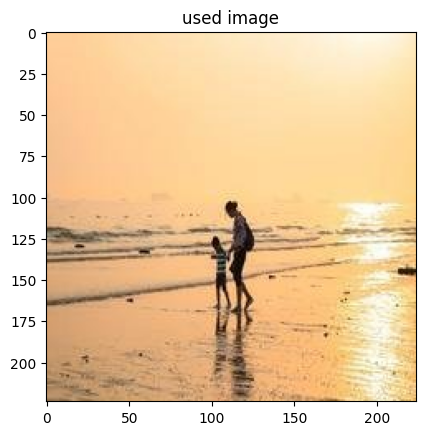

In [8]:
import torch
from transformers import ViTForImageClassification, ViTFeatureExtractor
from PIL import Image
import torch.nn.functional as F
import io
import matplotlib.pyplot as plt

# 이미지 압축 손실을 시뮬레이션하는 함수
def simulate_compression_loss(img, format='JPEG', quality=85):
    buffer = io.BytesIO()
    img.save(buffer, format=format, quality=quality)
    buffer.seek(0)
    compressed_img = Image.open(buffer)
    return compressed_img

# 이미지를 처리하고 압축 손실을 시뮬레이션하는 함수
def process_image(image_path, new_size=(224, 224), simulate_loss=True):
    img = Image.open(image_path)
    resized_img = img.resize(new_size, Image.ANTIALIAS)

    if simulate_loss:
        # 압축 손실 시뮬레이션 적용
        resized_img = simulate_compression_loss(resized_img)

    return resized_img

# 모델과 특징 추출기 초기화
num_labels = 29
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224-in21k", num_labels=num_labels)
model_path = "/content/drive/MyDrive/models/test/Vit_model_best_epoch_2.pth"  # 학습 모델 경로
model.load_state_dict(torch.load(model_path), strict=False)
model.eval()

feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")

# 이미지 처리
image_path = "/content/drive/MyDrive/Data_set2/test/test_tag_09/tag09_733.jpg"  # 테스트 이미지 경로
resized_img = process_image(image_path)

# 특징 추출
inputs = feature_extractor(images=resized_img, return_tensors="pt")

# 모델 예측
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    probabilities = F.softmax(logits, dim=1)

# 클래스 인덱스-라벨 매핑
class_idx_to_label = {
    0: '출/퇴근',
    1: '일/공부',
    2: '집',
    3: '카페',
    4: '드라이브',
    5: '거리',
    6: '클럽',
    7: '파티',
    8: '휴식',
    9: '해변',
    10: '집중',
    11: '여유',
    12: '아침',
    13: '밥',
    14: '산책',
    15: '운동',
    16: '행복',
    17: '화남',
    18: '몽환적인',
    19: '밝은',
    20: '슬픔',
    21: '우울/외로움',
    22: '편안한',
    23: '사랑',
    24: '봄',
    25: '여름',
    26: '가을',
    27: '겨울',
    28: '우중충한날'
}

# 높은 확률의 예측 출력
threshold = 0.1  # 예측 확률 임계값 설정
high_prob_predictions = (probabilities > threshold).nonzero(as_tuple=True)[1]
for idx in high_prob_predictions:
    predicted_label = class_idx_to_label.get(idx.item(), "Unknown")
    print(f"Predicted label: {predicted_label} with probability {probabilities[0, idx].item()}")

# 사용한 이미지
plt.imshow(resized_img)
plt.title("used image")
plt.show()
